# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages, which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission if necessary. 

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the iPython Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission. 

In addition to implementing code, there is a writeup to complete. The writeup should be completed in a separate file, which can be either a markdown file or a pdf document. There is a [write up template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) that can be used to guide the writing process. Completing the code template and writeup template will cover all of the [rubric points](https://review.udacity.com/#!/rubrics/481/view) for this project.

The [rubric](https://review.udacity.com/#!/rubrics/481/view) contains "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. The stand out suggestions are optional. If you decide to pursue the "stand out suggestions", you can include the code in this Ipython notebook and also discuss the results in the writeup file.


>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data

In [1]:
import numpy as np
import matplotlib
from matplotlib import pyplot
import tensorflow as tf

In [2]:
# Load pickled data
import pickle

# TODO: Fill this in based on where you saved the training and testing data
training_file = "./traffic-signs-data/train.p"
testing_file = "./traffic-signs-data/test.p"
validation_file="./traffic-signs-data/valid.p"


with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_valid, y_valid = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']

print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_valid shape:", X_valid.shape)
print("y_valid shape:", y_valid.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X_train shape: (34799, 32, 32, 3)
y_train shape: (34799,)
X_valid shape: (4410, 32, 32, 3)
y_valid shape: (4410,)
X_test shape: (12630, 32, 32, 3)
y_test shape: (12630,)


---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 1D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below. Use python, numpy and/or pandas methods to calculate the data summary rather than hard coding the results. For example, the [pandas shape method](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.shape.html) might be useful for calculating some of the summary results. 

### Provide a Basic Summary of the Data Set Using Python, Numpy and/or Pandas

In [3]:
### Replace each question mark with the appropriate value. 
### Use python, pandas or numpy methods rather than hard coding the results

# TODO: Number of training examples
n_train = len(X_train)

# TODO: Number of validation examples
n_validation = len(X_valid)

# TODO: Number of testing examples.
n_test = len(X_test)

# TODO: What's the shape of an traffic sign image?
image_shape = X_train[0].shape

# TODO: How many unique classes/labels there are in the dataset.
n_classes = len(np.unique(y_train))

print("Number of training examples =", n_train)
print("Number of validation examples =", n_validation)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("X_train shape:", X_train.shape)
print("Number of classes =", n_classes)

Number of training examples = 34799
Number of validation examples = 4410
Number of testing examples = 12630
Image data shape = (32, 32, 3)
X_train shape: (34799, 32, 32, 3)
Number of classes = 43


### Include an exploratory visualization of the dataset

Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc. 

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections. It can be interesting to look at the distribution of classes in the training, validation and test set. Is the distribution the same? Are there more examples of some classes than others?

0: Speed limit (20km/h)  180 samples


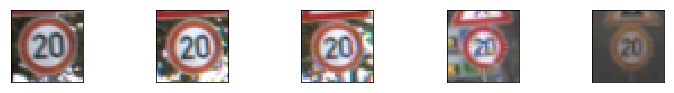

1: Speed limit (30km/h)  1980 samples


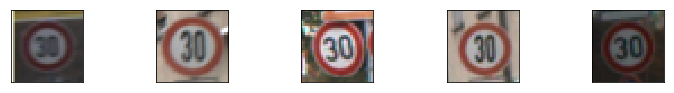

2: Speed limit (50km/h)  2010 samples


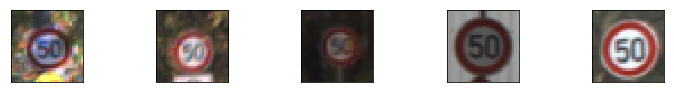

3: Speed limit (60km/h)  1260 samples


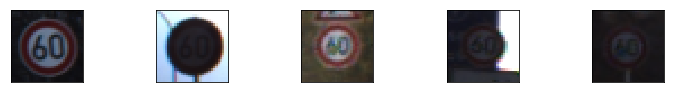

4: Speed limit (70km/h)  1770 samples


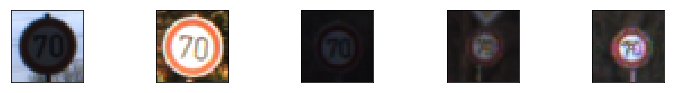

5: Speed limit (80km/h)  1650 samples


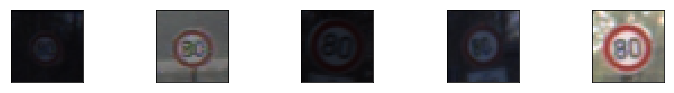

6: End of speed limit (80km/h)  360 samples


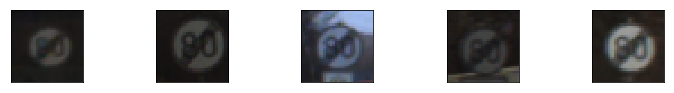

7: Speed limit (100km/h)  1290 samples


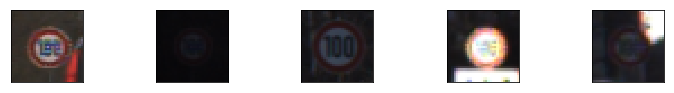

8: Speed limit (120km/h)  1260 samples


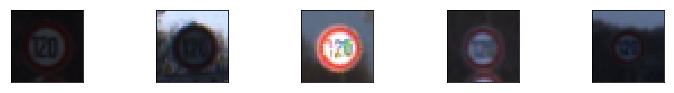

9: No passing  1320 samples


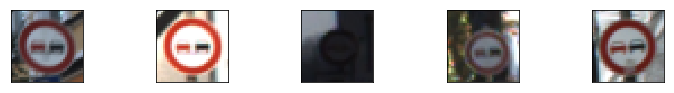

10: No passing for vehicles over 3.5 metric tons  1800 samples


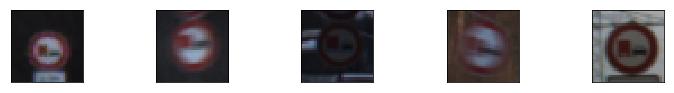

11: Right-of-way at the next intersection  1170 samples


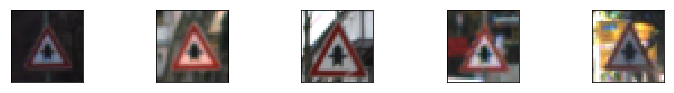

12: Priority road  1890 samples


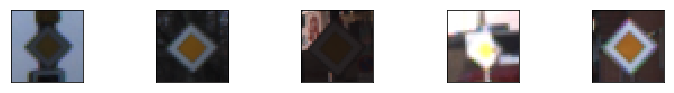

13: Yield  1920 samples


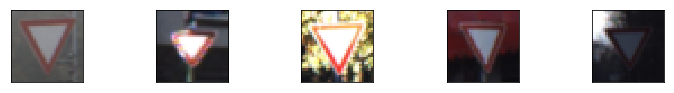

14: Stop  690 samples


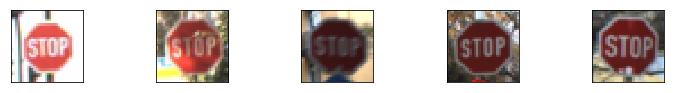

15: No vehicles  540 samples


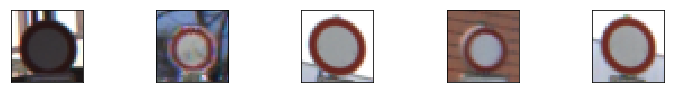

16: Vehicles over 3.5 metric tons prohibited  360 samples


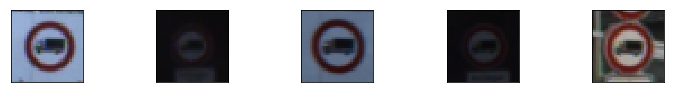

17: No entry  990 samples


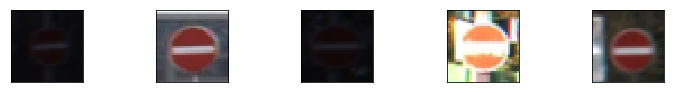

18: General caution  1080 samples


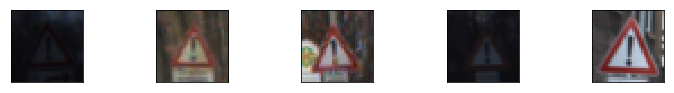

19: Dangerous curve to the left  180 samples


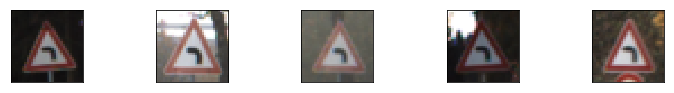

20: Dangerous curve to the right  300 samples


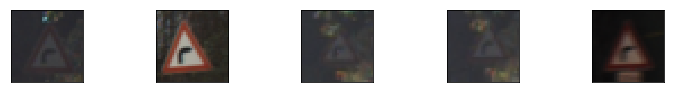

21: Double curve  270 samples


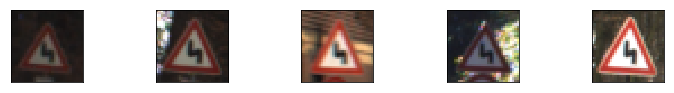

22: Bumpy road  330 samples


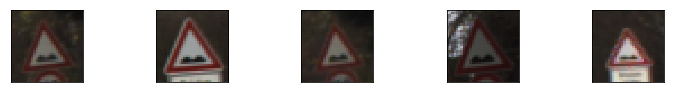

23: Slippery road  450 samples


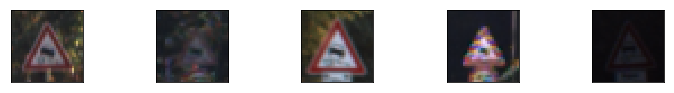

24: Road narrows on the right  240 samples


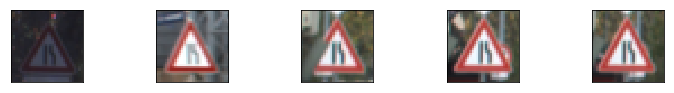

25: Road work  1350 samples


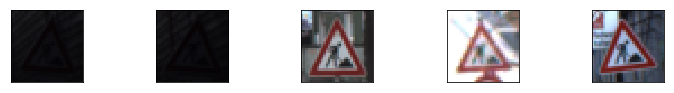

26: Traffic signals  540 samples


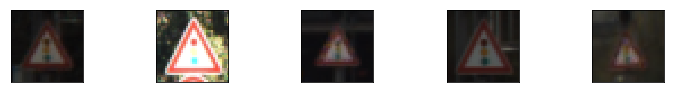

27: Pedestrians  210 samples


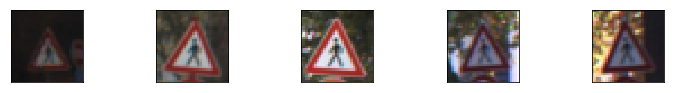

28: Children crossing  480 samples


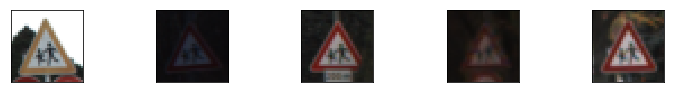

29: Bicycles crossing  240 samples


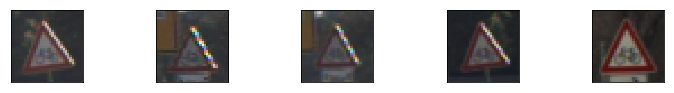

30: Beware of ice/snow  390 samples


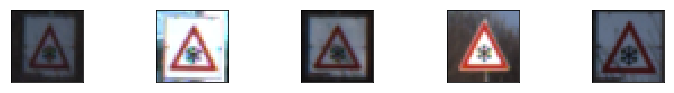

31: Wild animals crossing  690 samples


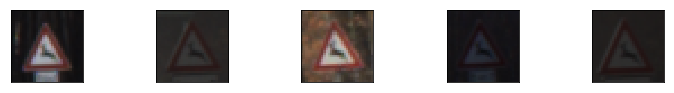

32: End of all speed and passing limits  210 samples


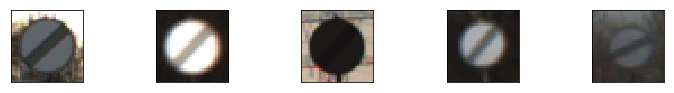

33: Turn right ahead  599 samples


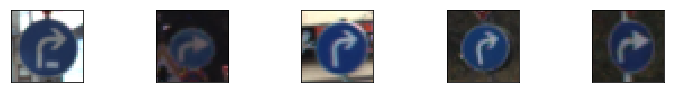

34: Turn left ahead  360 samples


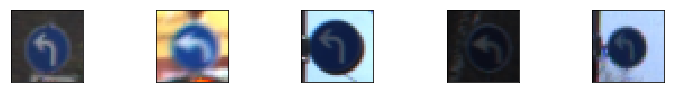

35: Ahead only  1080 samples


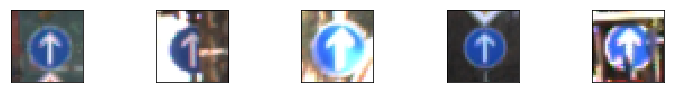

36: Go straight or right  330 samples


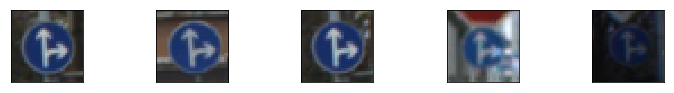

37: Go straight or left  180 samples


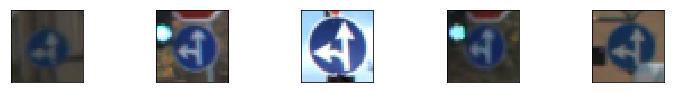

38: Keep right  1860 samples


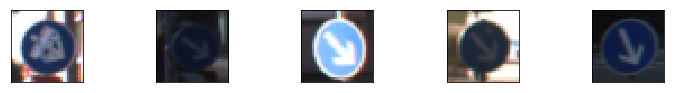

39: Keep left  270 samples


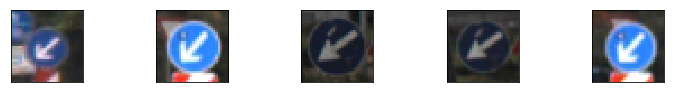

40: Roundabout mandatory  300 samples


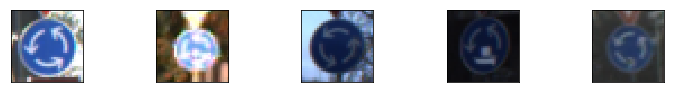

41: End of no passing  210 samples


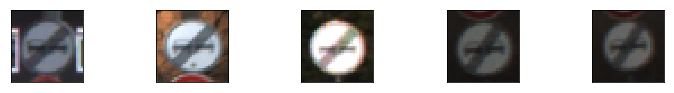

42: End of no passing by vehicles over 3.5 metric tons  210 samples


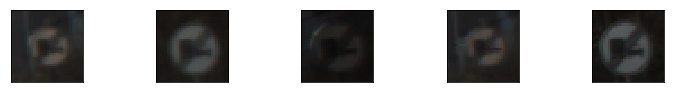

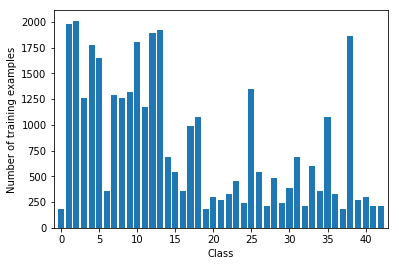

In [4]:
### Data exploration visualization code goes here.
### Feel free to use as many code cells as needed.
import matplotlib.pyplot as plt
# Visualizations will be shown in the notebook.
%matplotlib inline
import random
from pandas.io.parsers import read_csv

signnames = read_csv("signnames.csv").values[:, 1]
sign_classes, class_indices, class_counts = np.unique(y_train, return_index = True, return_counts = True)

for c, c_index, c_count in zip(sign_classes, class_indices, class_counts):
    print("%i: %-2s  %s samples" % (c, signnames[c], str(c_count)))
    fig = pyplot.figure(figsize = (10, 1))
    fig.subplots_adjust(left = 0, right = 1, bottom = 0, top = 1, hspace = 0.05, wspace = 0.05)
    random_indices = random.sample(range(c_index, c_index + c_count), 5)
    for i in range(5):
        axis = fig.add_subplot(1, 5, i + 1, xticks=[], yticks=[])
        axis.imshow(X_train[random_indices[i]])
    pyplot.show()
    
pyplot.bar( np.arange( 43 ), class_counts, align='center' )
pyplot.xlabel('Class')
pyplot.ylabel('Number of training examples')
pyplot.xlim([-1, 43])
pyplot.show()

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play! 

With the LeNet-5 solution from the lecture, you should expect a validation set accuracy of about 0.89. To meet specifications, the validation set accuracy will need to be at least 0.93. It is possible to get an even higher accuracy, but 0.93 is the minimum for a successful project submission. 

There are various aspects to consider when thinking about this problem:

- Neural network architecture (is the network over or underfitting?)
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

### Pre-process the Data Set (normalization, grayscale, etc.)

Minimally, the image data should be normalized so that the data has mean zero and equal variance. For image data, `(pixel - 128)/ 128` is a quick way to approximately normalize the data and can be used in this project. 

Other pre-processing steps are optional. You can try different techniques to see if it improves performance. 

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project.

In [5]:
### Preprocess the data here. It is required to normalize the data. Other preprocessing steps could include 
### converting to grayscale, etc.

### Conversion to grayscale
X_train_grey = 0.2989 * X_train[:,:,:,0] + 0.5870 * X_train[:,:,:,1] + 0.1140 * X_train[:,:,:,2]
X_test_grey = 0.2989 * X_test[:,:,:,0] + 0.5870 * X_test[:,:,:,1] + 0.1140 * X_test[:,:,:,2]
X_valid_grey = 0.2989 * X_valid[:,:,:,0] + 0.5870 * X_valid[:,:,:,1] + 0.1140 * X_valid[:,:,:,2]
print('X_train_grey', X_train_grey.shape)

X_train_grey = X_train_grey.reshape([X_train_grey.shape[0],32,32,1])
X_test_grey = X_test_grey.reshape([X_test_grey.shape[0],32,32,1])
X_valid_grey = X_valid_grey.reshape([X_valid_grey.shape[0],32,32,1])
print('X_train_grey_reshape', X_train_grey.shape)


X_train_grey (34799, 32, 32)
X_train_grey_reshape (34799, 32, 32, 1)


In [6]:
## Normalize the train and test datasets to (-1,1)

X_train_normalized = (X_train_grey - 128)/128 
X_test_normalized = (X_test_grey - 128)/128
X_valid_normalized = (X_valid_grey - 128)/128
print(np.mean(X_train_normalized))

X_train = X_train_normalized
X_test = X_test_normalized
X_valid = X_valid_normalized

-0.360095327137


In [7]:
## Shuffle the training dataset

from sklearn.utils import shuffle

X_train, y_train = shuffle(X_train, y_train)

### Model Architecture

In [8]:
### Define your architecture here.
### Feel free to use as many code cells as needed.
from tensorflow.contrib.layers import flatten

def Sermanet_LeCun(x):    
  
    # TODO: Layer 1: Convolutional. Input = 32x32x1. Output = 28x28x6.
    with tf.variable_scope('layer1'):
        W1 = tf.get_variable("W1", shape=(5, 5, 1, 6),
           initializer=tf.contrib.layers.xavier_initializer())
        x = tf.nn.conv2d(x, W1, strides=[1, 1, 1, 1], padding='VALID')
        b1 = tf.Variable(tf.zeros(6))
        x = tf.nn.bias_add(x, b1)

    # TODO: Activation.
        x = tf.nn.relu(x)
    
    # TODO: Pooling. Input = 28x28x6. Output = 14x14x6.
        x = tf.nn.max_pool(x, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')
        layer1 = x
    
    # TODO: Layer 2: Convolutional. Output = 10x10x16.
    with tf.variable_scope('layer2'):
        W2 = tf.get_variable("W2", shape=(5, 5, 6, 16),
           initializer=tf.contrib.layers.xavier_initializer())
        x = tf.nn.conv2d(x, W2, strides=[1, 1, 1, 1], padding='VALID')
        b2 = tf.Variable(tf.zeros(16))
        x = tf.nn.bias_add(x, b2)
                     
    # TODO: Activation.
        x = tf.nn.relu(x)

    # TODO: Pooling. Input = 10x10x16. Output = 5x5x16.
        x = tf.nn.max_pool(x, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')
        layer2 = x
    
    # TODO: Layer 3: Convolutional. Output = 1x1x400.
    with tf.variable_scope('layer3'):
        W3 = tf.get_variable("W3", shape=(5, 5, 16, 400),
           initializer=tf.contrib.layers.xavier_initializer())
        x = tf.nn.conv2d(x, W3, strides=[1, 1, 1, 1], padding='VALID')
        b3 = tf.Variable(tf.zeros(400))
        x = tf.nn.bias_add(x, b3)
                     
    # TODO: Activation.
        x = tf.nn.relu(x)
        layer3 = x

    # TODO: Flatten. Input = 5x5x16. Output = 400.
    layer2flat = flatten(layer2)
    
    # Flatten x. Input = 1x1x400. Output = 400.
    xflat = flatten(x)
    
    # Concat layer2flat and x. Input = 400 + 400. Output = 800
    x = tf.concat_v2([xflat, layer2flat], 1)
    
    # Dropout
    x = tf.nn.dropout(x, keep_prob)
    
    # TODO: Layer 4: Fully Connected. Input = 800. Output = 43.
    W4 = tf.get_variable("W4", shape=(800, 43),
       initializer=tf.contrib.layers.xavier_initializer())
    b4 = tf.Variable(tf.zeros(43))    
    logits = tf.add(tf.matmul(x, W4), b4)
      
    return logits

In [9]:
x = tf.placeholder(tf.float32, (None, 32, 32, 1))
y = tf.placeholder(tf.int32, (None))
keep_prob = tf.placeholder(tf.float32) # probability to keep units
one_hot_y = tf.one_hot(y, 43)

### Train, Validate and Test the Model

A validation set can be used to assess how well the model is performing. A low accuracy on the training and validation
sets imply underfitting. A high accuracy on the training set but low accuracy on the validation set implies overfitting.

In [10]:
### Train your model here.
### Calculate and report the accuracy on the training and validation set.
### Once a final model architecture is selected, 
### the accuracy on the test set should be calculated and reported as well.
### Feel free to use as many code cells as needed.
rate = 0.0001

logits = Sermanet_LeCun(x)
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(logits, one_hot_y)
loss_operation = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(learning_rate = rate)
training_operation = optimizer.minimize(loss_operation)


In [11]:
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
saver = tf.train.Saver()

def evaluation(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y, keep_prob: 1.0})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples

In [12]:
import os
EPOCHS = 80
BATCH_SIZE = 100

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    num_examples = len(X_train)
    
    print("Training...")
    print()
    for i in range(EPOCHS):
        X_train, y_train = shuffle(X_train, y_train)
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_train[offset:end], y_train[offset:end]
            sess.run(training_operation, feed_dict={x: batch_x, y: batch_y, keep_prob: 0.5})
            
        validation_accuracy = evaluation(X_valid, y_valid)
        print("EPOCH {} ...".format(i+1))
        print("Validation Accuracy = {:.3f}".format(validation_accuracy))
        print()
     
    try:
        saver
    except NameError :
        saver = tf.train.Saver()
    save_path = saver.save(sess,os.path.join(os.getcwd(),'Sermanet_LeCun'))
    print("Model saved to path",save_path)

Training...

EPOCH 1 ...
Validation Accuracy = 0.271

EPOCH 2 ...
Validation Accuracy = 0.484

EPOCH 3 ...
Validation Accuracy = 0.631

EPOCH 4 ...
Validation Accuracy = 0.710

EPOCH 5 ...
Validation Accuracy = 0.755

EPOCH 6 ...
Validation Accuracy = 0.786

EPOCH 7 ...
Validation Accuracy = 0.803

EPOCH 8 ...
Validation Accuracy = 0.828

EPOCH 9 ...
Validation Accuracy = 0.831

EPOCH 10 ...
Validation Accuracy = 0.844

EPOCH 11 ...
Validation Accuracy = 0.855

EPOCH 12 ...
Validation Accuracy = 0.873

EPOCH 13 ...
Validation Accuracy = 0.871

EPOCH 14 ...
Validation Accuracy = 0.882

EPOCH 15 ...
Validation Accuracy = 0.887

EPOCH 16 ...
Validation Accuracy = 0.891

EPOCH 17 ...
Validation Accuracy = 0.890

EPOCH 18 ...
Validation Accuracy = 0.894

EPOCH 19 ...
Validation Accuracy = 0.899

EPOCH 20 ...
Validation Accuracy = 0.900

EPOCH 21 ...
Validation Accuracy = 0.902

EPOCH 22 ...
Validation Accuracy = 0.903

EPOCH 23 ...
Validation Accuracy = 0.903

EPOCH 24 ...
Validation Accura

In [13]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    saver2 = tf.train.import_meta_graph('./Sermanet_LeCun.meta')
    saver2.restore(sess, "./Sermanet_LeCun")
    test_accuracy = evaluation(X_test, y_test)
    print("Test Set Accuracy = {:.3f}".format(test_accuracy))

Test Set Accuracy = 0.921


---

## Step 3: Test a Model on New Images

To give yourself more insight into how your model is working, download at least five pictures of German traffic signs from the web and use your model to predict the traffic sign type.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Load and Output the Images

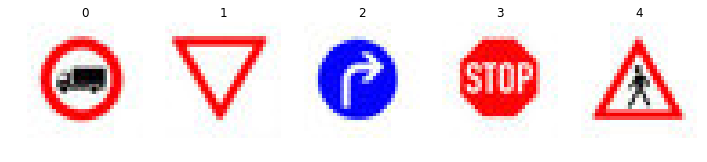

In [14]:
### Load the images and plot them here.
### Feel free to use as many code cells as needed.
import glob
import csv
import cv2

#Import traffic signs class names

sign_class=[]
with open('signnames.csv', 'rt') as csvfile:
    reader = csv.DictReader(csvfile, delimiter=',')
    for row in reader:
        sign_class.append((row['SignName']))

#Import deployment images  
deploy_img_path = [img_path for img_path in glob.glob("./Test_images_from_net/*")]
deploy_img=np.uint8(np.zeros((5,32,32,3)))
for i, imp in enumerate(deploy_img_path):
    img=cv2.imread(imp, cv2.IMREAD_COLOR)
    b,g,r = cv2.split(img)
    img = cv2.merge([r,g,b])
    deploy_img[i]=img

#Visualize new raw images
plt.figure(figsize=(12, 8))
for i in range(5):
    plt.subplot(1,5, i+1)
    plt.imshow(deploy_img[i]) 
    plt.title(i)
    plt.axis('off')
plt.show()



### Predict the Sign Type for Each Image

In [15]:
### Run the predictions here and use the model to output the prediction for each image.
### Make sure to pre-process the images with the same pre-processing pipeline used earlier.

### Pre-processing the images with the same pre-processing pipeline 
deploy_img_grey = 0.2989 * deploy_img[:,:,:,0] + 0.5870 * deploy_img[:,:,:,1] + 0.1140 * deploy_img[:,:,:,2]
deploy_img_grey = deploy_img_grey.reshape([deploy_img_grey.shape[0],32,32,1])
deploy_img_normalized = (deploy_img_grey - 128)/128 

deploy_labels = [16, 13, 33, 14, 27]

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    saver3 = tf.train.import_meta_graph('./Sermanet_LeCun.meta')
    saver3.restore(sess, "./Sermanet_LeCun")
    my_accuracy = evaluation(deploy_img_normalized, deploy_labels)
    print("Deployment Accuracy = {:.3f}".format(my_accuracy))

Deployment Accuracy = 1.000


### Output Top 5 Softmax Probabilities For Each Image Found on the Web

For each of the new images, print out the model's softmax probabilities to show the **certainty** of the model's predictions (limit the output to the top 5 probabilities for each image). [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. 

The example below demonstrates how tf.nn.top_k can be used to find the top k predictions for each image.

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example. The values in the array represent predictions. The array contains softmax probabilities for five candidate images with six possible classes. `tf.nn.top_k` is used to choose the three classes with the highest probability:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

In [16]:
### Print out the top five softmax probabilities for the predictions on the German traffic sign images found on the web. 
### Feel free to use as many code cells as needed.
softmax_logits = tf.nn.softmax(logits)
top_5 = tf.nn.top_k(softmax_logits, k=5)

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    saver = tf.train.import_meta_graph('./Sermanet_LeCun.meta')
    saver.restore(sess, "./Sermanet_LeCun")
    Test_softmax_logits = sess.run(softmax_logits, feed_dict={x: deploy_img_normalized, keep_prob: 1.0})
    Test_top_5 = sess.run(top_5, feed_dict={x: deploy_img_normalized, keep_prob: 1.0})

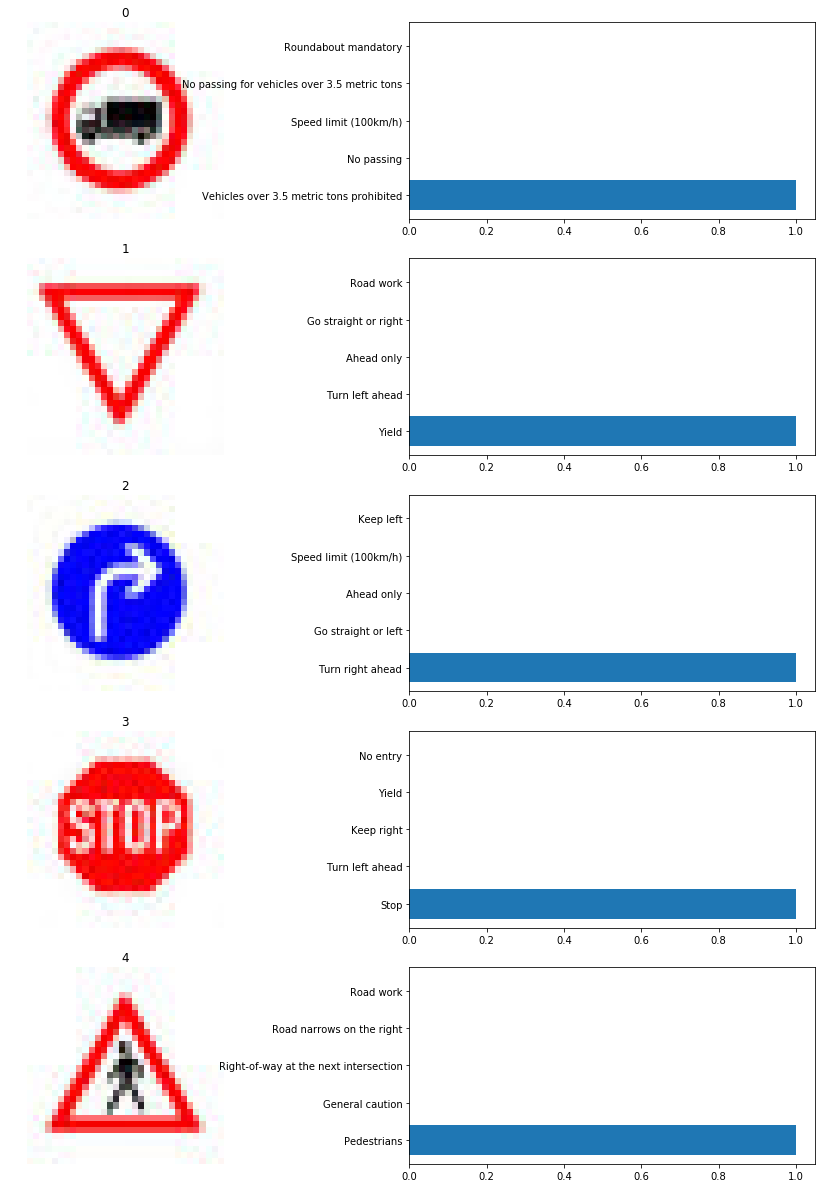

In [17]:
plt.figure(figsize=(16, 21))
for i in range(5):
    plt.subplot(5, 2, 2*i+1)
    plt.imshow(deploy_img[i]) 
    plt.title(i)
    plt.axis('off')
    plt.subplot(5, 2, 2*i+2)
    plt.barh(np.arange(1, 6, 1), Test_top_5.values[i, :])
    labs=[sign_class[j] for j in Test_top_5.indices[i]]
    plt.yticks(np.arange(1, 6, 1), labs)
plt.show()

### Project Writeup

Once you have completed the code implementation, document your results in a project writeup using this [template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) as a guide. The writeup can be in a markdown or pdf file. 

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.